In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import pandas as pd
#define file path
opioid_file = "Wide_Master.csv"
#read CSV
opioid_data = pd.read_csv(opioid_file)
#make CSV into a dataframe
opioid_df_raw = pd.DataFrame(opioid_data)


opioid_df_raw.head()

,State,County,Year,Total,Heroin,Other,Methadone,Population,LandArea,Bike,...,Income,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance"
0,Alabama,Baldwin,2011,10.0,NaN,NaN,NaN,186717.0,1589.78,1.0,...,67770.0,5147.0,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277
1,Alabama,Cullman,2011,NaN,NaN,NaN,NaN,80536.0,734.84,NaN,...,51374.0,1582.0,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610
2,Alabama,Etowah,2011,NaN,NaN,NaN,NaN,104303.0,534.99,NaN,...,51330.0,1833.0,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563
3,Alabama,Jefferson,2011,39.0,10.0,28.0,10.0,658931.0,1111.28,0.1,...,66409.0,20934.0,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034
4,Alabama,Madison,2011,14.0,NaN,12.0,NaN,340111.0,801.59,0.3,...,76342.0,14164.0,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690


In [2]:
#drop rows which have NaN in columns listed below as they are missing too much information
opioid_df = opioid_df_raw

opioid_df = opioid_df.dropna(subset=['LandArea', 'Income', 'Unemployment', 'GDP Total'])
len(opioid_df.index)

5048

In [3]:
# Make all other NaN in data 0
clean_df=opioid_df.fillna(0)

#Recalculate the Death Total as dataset documentation states totals do not all add up 
#"due to the fact that low death rate of a county was withheld from data to protect privacy of individuals" 
#for this study purposes those deaths with withheld information will not be used. All Death totals is a sum of the three possible causes.
clean_df['Death Total']=clean_df[['Heroin', 'Other', 'Methadone']].sum(axis=1)
#delete the original total column
del clean_df['Total']
clean_df.head(15)


,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Non_US_Born,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,5147.0,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277,0.0
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,1582.0,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610,0.0
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,1833.0,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563,0.0
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,20934.0,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034,48.0
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,14164.0,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690,12.0
5,Alabama,Mobile,2011,0.0,0.0,0.0,412577.0,1229.44,0.1,8.3,...,10353.0,34983.0,18327.0,89397.0,45351.0,77770.0,10.8,17901892.0,1474168,0.0
6,Alabama,Shelby,2011,0.0,0.0,0.0,197936.0,784.93,0.0,7.9,...,8237.0,35082.0,16044.0,28446.0,11010.0,37186.0,6.2,8268481.0,490108,0.0
8,Alabama,Tuscaloosa,2011,0.0,0.0,0.0,197211.0,1321.75,0.2,9.5,...,4714.0,17400.0,11918.0,35385.0,16568.0,31285.0,8.3,9382954.0,463507,0.0
9,Alabama,Walker,2011,0.0,0.0,17.0,66661.0,791.19,0.0,0.0,...,579.0,2881.0,1774.0,16597.0,11204.0,14207.0,11.3,1795958.0,185026,17.0
11,Alaska,Fairbanks North Star Borough,2011,0.0,0.0,0.0,99192.0,7338.21,1.1,13.1,...,4231.0,9714.0,6375.0,15289.0,4059.0,22632.0,6.4,5562537.0,375558,0.0


In [4]:
# Save into a new CSV called Clean_data.csv for analysis
clean_df.to_csv('clean_data.csv')

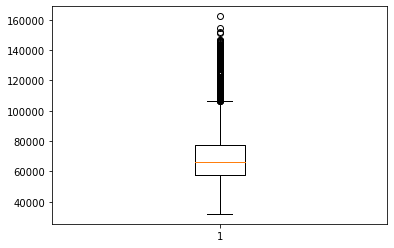

In [5]:
incomes = clean_df['Income']
plt.boxplot(incomes)
plt.show()

In [6]:
quartiles = incomes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


In [7]:

for col in clean_df.columns:
    print(col)

State
County
Year
Heroin
Other
Methadone
Population
LandArea
Bike
Carpool
Alone
Public
Walk
Home
Income
Non_US_Born
Bachelor_Degree
Grad_Degree
HS_Grad
Less_Than_HS
Associates_Degree
Unemployment
GDP Total
GDP Education, Health, Social Assistance
Death Total


In [8]:
#create pop density column
pop_density = clean_df['Population']/clean_df['LandArea']
pop_density

0       117.448326
1       109.596647
2       194.962523
3       592.947772
4       424.295463
           ...    
5407    313.677734
5408    728.971742
5409    392.216161
5410      4.334040
5411     14.895466
Length: 5048, dtype: float64

In [9]:
clean_df['Population Density'] = pop_density
clean_df.head()

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Bike,Carpool,...,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree,Unemployment,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,1.0,12.9,...,22946.0,10923.0,36271.0,15094.0,39216.0,9.0,5016735.0,478277,0.0,117.448326
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,0.0,0.0,...,4807.0,2940.0,17883.0,12788.0,16286.0,9.5,2298846.0,207610,0.0,109.596647
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,0.0,0.0,...,6642.0,4270.0,22939.0,13064.0,24325.0,10.0,2801621.0,430563,0.0,194.962523
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,0.1,9.6,...,78798.0,48016.0,121313.0,58142.0,131726.0,9.3,39515681.0,4542034,48.0,592.947772
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,0.3,6.6,...,50973.0,30157.0,48925.0,24067.0,62801.0,8.3,19512201.0,1135690,12.0,424.295463


In [10]:
#create new dataframe for education data analysis
edu_df = clean_df.iloc[:,[16,17,18,19,20]]
edu_df.head()

,Bachelor_Degree,Grad_Degree,HS_Grad,Less_Than_HS,Associates_Degree
0,22946.0,10923.0,36271.0,15094.0,39216.0
1,4807.0,2940.0,17883.0,12788.0,16286.0
2,6642.0,4270.0,22939.0,13064.0,24325.0
3,78798.0,48016.0,121313.0,58142.0,131726.0
4,50973.0,30157.0,48925.0,24067.0,62801.0


In [53]:
#create new list with total educated
edu_df['Total Educated'] = edu_df.sum(axis=1)
edu_df['Bachelors %'] = edu_df['Bachelor_Degree']/edu_df['Total Educated']*100
edu_df['Grad %'] = edu_df['Grad_Degree']/edu_df['Total Educated']*100
edu_df['HS %'] = edu_df['HS_Grad']/edu_df['Total Educated']*100
edu_df['Less HS %'] = edu_df['Less_Than_HS']/edu_df['Total Educated']*100
edu_df['Associates %'] = edu_df['Associates_Degree']/edu_df['Total Educated']*100
del edu_df['Bachelor_Degree']
del edu_df['Grad_Degree']                             
del edu_df['HS_Grad']                                     
del edu_df['Less_Than_HS']                                
del edu_df['Associates_Degree']
edu_df

<ipython-input-53-bae6acb166f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_df['Total Educated'] = edu_df.sum(axis=1)
<ipython-input-53-bae6acb166f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_df['Bachelors %'] = edu_df['Bachelor_Degree']/edu_df['Total Educated']*100
<ipython-input-53-bae6acb166f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,6.224947e+05,3.686136,1.754714,5.826716,2.424760,6.299813
1,2.737712e+05,1.755846,1.073890,6.532097,4.671054,5.948763
2,3.564506e+05,1.863372,1.197922,6.435393,3.665024,6.824227
3,2.190219e+06,3.597723,2.192292,5.538853,2.654621,6.014285
4,1.084855e+06,4.698602,2.779819,4.509821,2.218454,5.788886
...,...,...,...,...,...,...
5407,4.689134e+05,4.332569,1.604987,6.034589,1.115558,6.901914
5408,1.389022e+06,5.652251,2.929616,4.721020,0.799411,5.894292
5409,5.684146e+05,3.907887,1.554851,6.862596,1.526878,6.139180
5410,1.341515e+05,3.099480,1.545267,6.333881,1.774858,7.209756


In [54]:
clean_df.dtypes


State                                        object
County                                       object
Year                                          int64
Heroin                                      float64
Other                                       float64
Methadone                                   float64
Population                                  float64
LandArea                                    float64
Bike                                        float64
Carpool                                     float64
Alone                                       float64
Public                                      float64
Walk                                        float64
Home                                        float64
Income                                      float64
Non_US_Born                                 float64
Bachelor_Degree                             float64
Grad_Degree                                 float64
HS_Grad                                     float64
Less_Than_HS

In [59]:
combined_df = pd.merge(clean_df,edu_df, left_index=True,right_index=True)
del combined_df['Bike']
del combined_df['Alone']
del combined_df['Carpool']
del combined_df['Walk']
del combined_df['Home']
del combined_df['Public']
del combined_df['Bachelor_Degree']
del combined_df['Grad_Degree']                             
del combined_df['HS_Grad']                                     
del combined_df['Less_Than_HS']                                
del combined_df['Associates_Degree']
combined_df

,State,County,Year,Heroin,Other,Methadone,Population,LandArea,Income,Non_US_Born,...,GDP Total,"GDP Education, Health, Social Assistance",Death Total,Population Density,Total Educated,Bachelors %,Grad %,HS %,Less HS %,Associates %
0,Alabama,Baldwin,2011,0.0,0.0,0.0,186717.0,1589.78,67770.0,5147.0,...,5016735.0,478277,0.0,117.448326,6.224947e+05,3.686136,1.754714,5.826716,2.424760,6.299813
1,Alabama,Cullman,2011,0.0,0.0,0.0,80536.0,734.84,51374.0,1582.0,...,2298846.0,207610,0.0,109.596647,2.737712e+05,1.755846,1.073890,6.532097,4.671054,5.948763
2,Alabama,Etowah,2011,0.0,0.0,0.0,104303.0,534.99,51330.0,1833.0,...,2801621.0,430563,0.0,194.962523,3.564506e+05,1.863372,1.197922,6.435393,3.665024,6.824227
3,Alabama,Jefferson,2011,10.0,28.0,10.0,658931.0,1111.28,66409.0,20934.0,...,39515681.0,4542034,48.0,592.947772,2.190219e+06,3.597723,2.192292,5.538853,2.654621,6.014285
4,Alabama,Madison,2011,0.0,12.0,0.0,340111.0,801.59,76342.0,14164.0,...,19512201.0,1135690,12.0,424.295463,1.084855e+06,4.698602,2.779819,4.509821,2.218454,5.788886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,Wisconsin,Washington,2017,0.0,12.0,0.0,135101.0,430.70,89470.0,2956.0,...,5636773.0,476010,12.0,313.677734,4.689134e+05,4.332569,1.604987,6.034589,1.115558,6.901914
5408,Wisconsin,Waukesha,2017,27.0,27.0,0.0,400621.0,549.57,105275.0,17376.0,...,28028503.0,2927629,54.0,728.971742,1.389022e+06,5.652251,2.929616,4.721020,0.799411,5.894292
5409,Wisconsin,Winnebago,2017,0.0,0.0,0.0,170414.0,434.49,71572.0,4719.0,...,9274302.0,649081,0.0,392.216161,5.684146e+05,3.907887,1.554851,6.862596,1.526878,6.139180
5410,Wyoming,Fremont,2017,0.0,0.0,0.0,39803.0,9183.81,70101.0,469.0,...,1595939.0,138479,0.0,4.334040,1.341515e+05,3.099480,1.545267,6.333881,1.774858,7.209756


In [62]:
state_df = combined_df.groupby(['State'])[['Heroin', 'Other','Methadone','Death Total']].sum()
state_df

,Heroin,Other,Methadone,Death Total
State,,,,
Alabama,428.0,328.0,108.0,864.0
Alaska,0.0,10.0,0.0,10.0
Arizona,1324.0,2151.0,409.0,3884.0
Arkansas,0.0,271.0,0.0,271.0
California,3127.0,6625.0,1483.0,11235.0
Colorado,358.0,542.0,21.0,921.0
Connecticut,1930.0,860.0,286.0,3076.0
Delaware,331.0,263.0,32.0,626.0
Florida,1826.0,5279.0,1127.0,8232.0


In [1]:
combined_df = pd.merge(clean_df,edu_df, left_index=True,right_index=True)
del combined_df['Bike']
del combined_df['Alone']
del combined_df['Carpool']
del combined_df['Walk']
del combined_df['Home']
del combined_df['Public']
del combined_df['Bachelor_Degree']
del combined_df['Grad_Degree']                             
del combined_df['HS_Grad']                                     
del combined_df['Less_Than_HS']                                
del combined_df['Associates_Degree']
combined_df
aver_income = combined_df.groupby(['State'])[['Income', 'Non_US_Born','GDP Total']].mean()
state_df = combined_df.groupby(['State'])[['Heroin', 'Other','Methadone','Death Total', 'Population','LandArea']].sum()
state_df = pd.merge(aver_income, state_df, left_index=True,right_index=True)
state_df

NameError: name 'pd' is not defined